In [46]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [47]:
#df = data = pd.read_csv('purchases.txt', sep="\s{1}", header = None, engine='python')

In [48]:
df = data = pd.read_csv('purchases.txt', sep="\s{1}", engine='python',header=None, names=['Customer_Id','VOT','DOT'])

In [49]:
# DOT is date of transaction
# VOT is value of transaction

In [50]:
df.info

<bound method DataFrame.info of        Customer_Id    VOT         DOT
0              760   25.0  2009-11-06
1              860   50.0  2012-09-28
2             1200  100.0  2005-10-25
3             1420   50.0  2009-07-09
4             1940   70.0  2013-01-25
...            ...    ...         ...
51238       163230   30.0  2011-11-12
51239       154410  100.0  2013-11-15
51240       189270   30.0  2014-12-23
51241       173810   30.0  2015-05-28
51242         9830   50.0  2011-11-30

[51243 rows x 3 columns]>

In [51]:
df.head()

,Customer_Id,VOT,DOT
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


In [52]:
import datetime as dt
NOW = dt.datetime(2020,12,31)

In [53]:
df['DOT'] = pd.to_datetime(df['DOT'])

In [54]:
df.head()

,Customer_Id,VOT,DOT
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


In [55]:
df['year_of_purchase'] = df['DOT'].dt.year

In [89]:
df.head()

,Customer_Id,VOT,DOT,year_of_purchase
0,760,25.0,2009-11-06,2009
1,860,50.0,2012-09-28,2012
2,1200,100.0,2005-10-25,2005
3,1420,50.0,2009-07-09,2009
4,1940,70.0,2013-01-25,2013


In [57]:
df.describe()

,Customer_Id,VOT,year_of_purchase
count,51243.000000,51243.000000,51243.000000
mean,108934.547938,62.337195,2010.869699
std,67650.610139,156.606801,2.883072
min,10.000000,5.000000,2005.000000
25%,57720.000000,25.000000,2009.000000
50%,102440.000000,30.000000,2011.000000
75%,160525.000000,60.000000,2013.000000
max,264200.000000,4500.000000,2015.000000


In [58]:
df.year_of_purchase.unique()

array([2009, 2012, 2005, 2013, 2006, 2007, 2010, 2011, 2014, 2008, 2015],
      dtype=int64)

In [59]:
df.skew(axis = 0, skipna = True) 

Customer_Id          0.280767
VOT                 14.382385
year_of_purchase    -0.228259
dtype: float64

In [60]:
import matplotlib.pyplot as plt

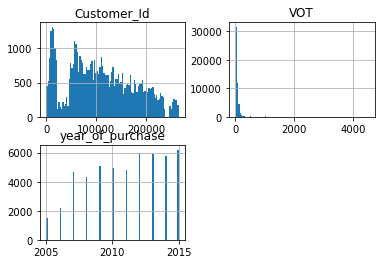

In [61]:
df[df['VOT'] >= 0].hist(bins=100)
plt.show()

In [118]:
result_group_year= df.groupby(['year_of_purchase'])
total_by_year = result_group_year['VOT'].agg([np.sum]).reset_index()
#total_by_year.plot(kind='bar' ,x='year',y='sum',rot=0,  legend=False)

In [119]:
#total_by_year = total_by_year.reset_index(drop=True)

In [120]:
total_by_year

,year_of_purchase,sum
0,2005,82064.40
1,2006,114010.49
2,2007,230260.00
3,2008,229853.88
4,2009,256466.51
5,2010,290116.92
6,2011,303939.85
7,2012,374963.34
8,2013,401610.18
9,2014,432665.20


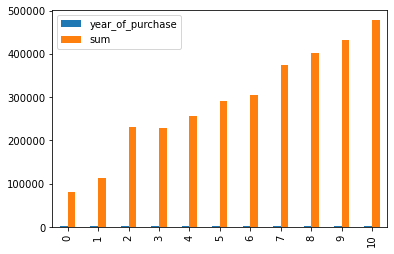

In [121]:
total_by_year.plot.bar()

In [65]:
rfmTable = df.groupby('Customer_Id').agg({'DOT': lambda x: (NOW - x.max()).days, # Recency
                                        'Customer_Id': lambda x: len(x),      # Frequency
                                        'VOT': lambda x: x.sum()}) # Monetary Value

rfmTable['DOT'] = rfmTable['DOT'].astype(int)
rfmTable.rename(columns={'DOT': 'recency', 
                         'Customer_Id': 'frequency', 
                         'VOT': 'monetary_value'}, inplace=True)

In [66]:
rfmTable.head()

,recency,frequency,monetary_value
Customer_Id,,,
10,5655,1,30.0
80,2169,7,500.0
90,2584,10,1158.0
120,3227,1,20.0
130,4796,2,100.0


In [67]:
rfmTable.sort_values(by=['frequency'],ascending=False)

,recency,frequency,monetary_value
Customer_Id,,,
9720,1855,45,2005.0
109370,1827,41,695.0
119430,2127,38,560.9
10720,1860,37,970.0
10640,1862,34,563.2
...,...,...,...
140980,3873,1,15.0
141020,3872,1,10.0
141050,3872,1,40.0


In [68]:
rfmTable.info

<bound method DataFrame.info of              recency  frequency  monetary_value
Customer_Id                                    
10              5655          1            30.0
80              2169          7           500.0
90              2584         10          1158.0
120             3227          1            20.0
130             4796          2           100.0
...              ...        ...             ...
263820          1827          1            10.0
263870          1961          1            50.0
263880          1860          1            20.0
263890          1831          1            54.0
264200          1827          1           500.0

[18417 rows x 3 columns]>

In [69]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])

In [70]:
quantiles

,recency,frequency,monetary_value
0.25,2070.0,1.0,30.0
0.50,2896.0,2.0,60.0
0.75,3956.0,3.0,150.0


In [71]:
quantiles = quantiles.to_dict()

In [72]:
quantiles

{'recency': {0.25: 2070.0, 0.5: 2896.0, 0.75: 3956.0},
 'frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 3.0},
 'monetary_value': {0.25: 30.0, 0.5: 60.0, 0.75: 150.0}}

In [73]:
rfmSegmentation = rfmTable

In [74]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [75]:
rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RClass, args=('recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [76]:
rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

In [77]:
rfmSegmentation.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
Customer_Id,,,,,,,
10,5655,1,30.0,4,4,4,444
80,2169,7,500.0,2,1,1,211
90,2584,10,1158.0,2,1,1,211
120,3227,1,20.0,3,4,4,344
130,4796,2,100.0,4,3,2,432


In [85]:
#rfmSegmentation[rfmSegmentation['RFMClass']=='111'].head()

In [84]:
rfmSegmentation[rfmSegmentation['RFMClass']=='111'].sort_values('monetary_value', ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
Customer_Id,,,,,,,
144610,1827,18,17000.0,1,1,1,111
54170,2058,10,13000.0,1,1,1,111
5330,2031,11,10975.0,1,1,1,111
20200,1829,10,10100.0,1,1,1,111
123480,2037,7,9500.0,1,1,1,111
